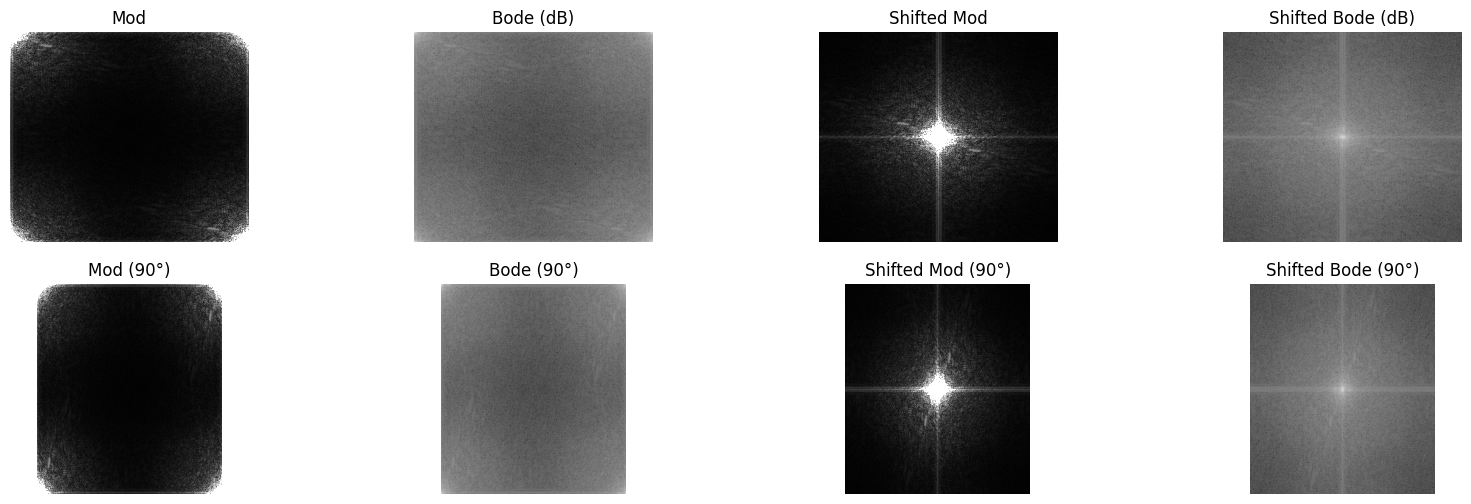

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# we have used fft function from np lib and then plotted absolute value that is magnitude of the fourier transform
# taking 20 log of that mod we will get bode plot
def MagnitudeSpectra(image):
    fourier = np.fft.fft2(image)
    shifted = np.fft.fftshift(fourier)
    mod = np.abs(fourier)
    bode = 20 * np.log(mod + 1)

    mod_shifted = np.abs(shifted)
    bode_shifted = 20 * np.log(mod_shifted + 1)
    return (mod,bode,mod_shifted,bode_shifted)

img1 = cv2.imread('F:\\Python\\EE200\\EE200_practical_programming\\cat_gray.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('F:\\Python\\EE200\\EE200_practical_programming\\dog_gray.jpg', cv2.IMREAD_GRAYSCALE)
# MagnitudeSpectra(img1)
mod,bode,mod_shifted,bode_shifted=MagnitudeSpectra(img2)
mod90,bode90,mod_shifted90,bode_shifted90=MagnitudeSpectra(np.rot90(img2))


titles = ['Mod', 'Bode (dB)', 'Shifted Mod', 'Shifted Bode (dB)',
          'Mod (90°)', 'Bode (90°)', 'Shifted Mod (90°)', 'Shifted Bode (90°)']

images = [mod, bode, mod_shifted, bode_shifted,
          mod90, bode90, mod_shifted90, bode_shifted90]

plt.figure(figsize=(20, 6))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    if 'Mod' in titles[i] and 'Bode' not in titles[i]:
        plt.imshow(images[i], cmap='gray', vmax=np.percentile(images[i], 99))
        # After solving the other part of this problem , frequency mixer :

        # but to compare with rotated image ignored some higher frequencies by showing vlues till 99%ile
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# in original bode magnitude plot we see that low frequencies are at edges or we say spectrum is centered at edges m  

initially I thought of using gaussian to blur the image and take Image minus gaussian to extract fine details
 I tried that first and that approach worked fine , I already knew that so to learn using numpy to achieve it I tried using ideal filters using numpy array to design req filters
 here in frequency domain we remove higher frequency, which corresponds to edges, to blur images and remove lower frequency to extract edges and textures
 higher freq -> more changes in intensity i.e edges
 lower freq -> less change or no changes in intensity i.e constant fill or no sharp edges

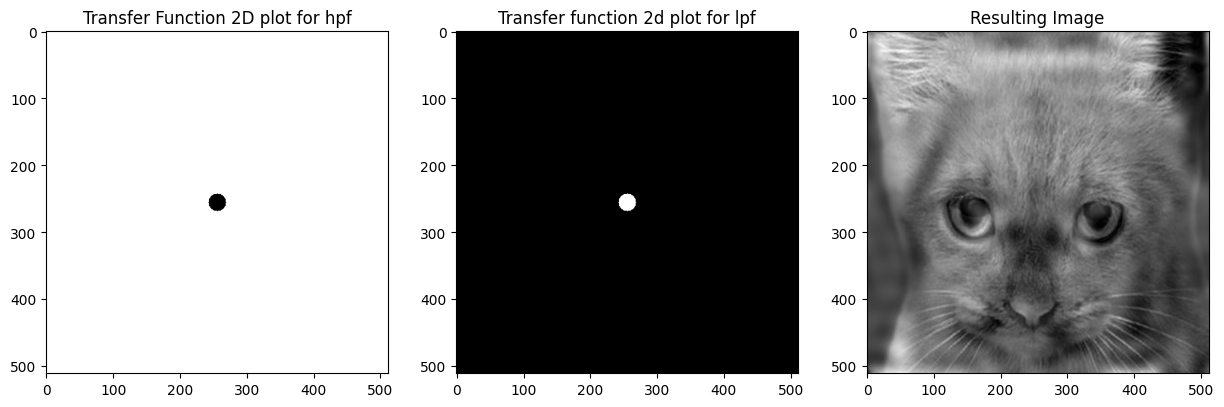

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

def low_pass(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    response = np.zeros((rows, cols), dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            dist_sq = (i - crow) ** 2 + (j - ccol) ** 2
            if dist_sq <= radius ** 2:
                response[i, j] = 1
    return response

def high_pass(shape, radius):
    return 1 - low_pass(shape, radius)

cat = cv.imread('F:\\Python\\EE200\\EE200_practical_programming\\cat_gray.jpg', cv.IMREAD_GRAYSCALE)
dog = cv.imread('F:\\Python\\EE200\\EE200_practical_programming\\dog_gray.jpg', cv.IMREAD_GRAYSCALE)
cat = cv.resize(cat, (512, 512))
dog = cv.resize(dog, (512, 512))

cat = cat.astype(np.float32) / 255.0
dog = dog.astype(np.float32) / 255.0

cat_fft = np.fft.fftshift(np.fft.fft2(cat))
dog_fft = np.fft.fftshift(np.fft.fft2(dog))

radius = 13
highpass_filter = high_pass(cat.shape, radius) 
lowpass_filter = low_pass(dog.shape, radius)

cat_filtered_fft = cat_fft * highpass_filter
dog_filtered_fft = dog_fft * lowpass_filter

result_fft = cat_filtered_fft + dog_filtered_fft

result = np.fft.ifft2(np.fft.ifftshift(result_fft))
result = np.abs(result)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Transfer Function 2D plot for hpf")
plt.imshow(np.log(1 + np.abs(highpass_filter)), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Transfer function 2d plot for lpf")
plt.imshow(np.log(1 + np.abs(lowpass_filter)), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Resulting Image")
plt.imshow(result, cmap='gray')
plt.show()


Question 2:

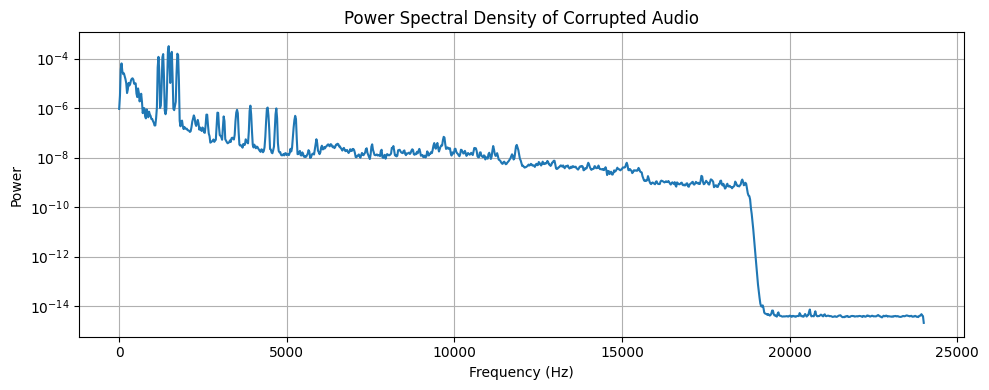

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from scipy import signal

y, sr = librosa.load("F:\\Python\\EE200\\EE200_practical_programming\\song_with_2piccolo.wav", sr=None) 
frequencies, psd = signal.welch(y, sr, nperseg=2048)

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, psd)
plt.title("Power Spectral Density of Corrupted Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)
plt.tight_layout()
plt.show()



there is higher power around 0-700 and 1000-1800Hz in PSD plot

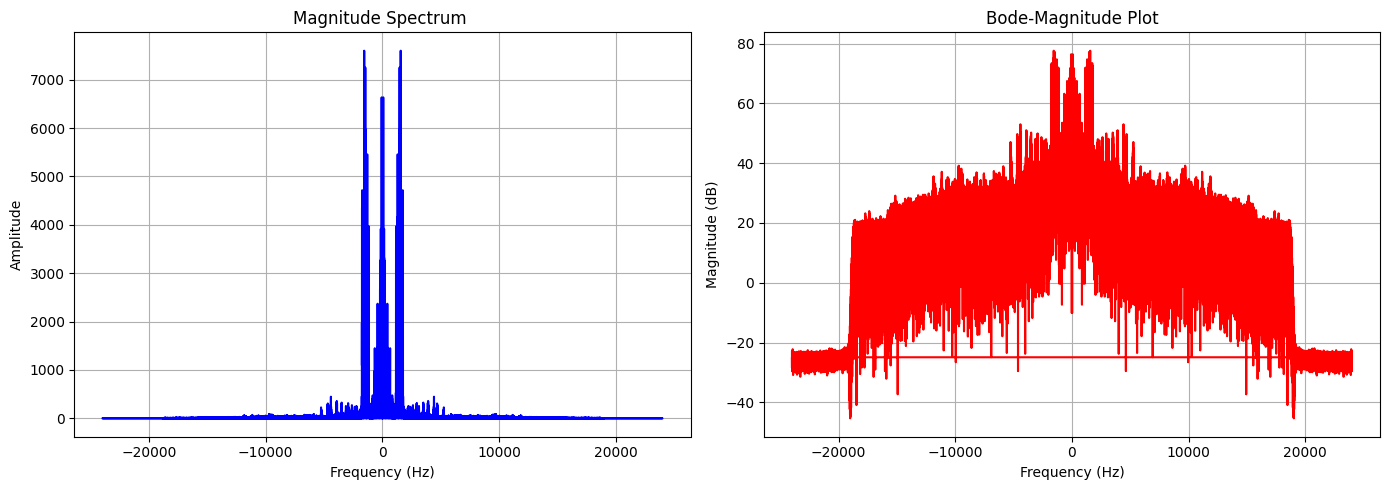

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

file_path = "F:\\Python\\EE200\\EE200_practical_programming\\song_with_2piccolo.wav"
y, sr = librosa.load(file_path, sr=None) 
N = len(y)
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(N, d=1/sr)

magnitude = np.abs(Y)
magnitude_db = 20 * np.log10(magnitude + 1e-8)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(freqs, magnitude, color='blue')
plt.title("Magnitude Spectrum ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(freqs, magnitude_db, color='red')
plt.title("Bode-Magnitude Plot")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)

plt.tight_layout()
plt.show()


Observations :- 
hovering cursor over graph we see maximum frequency content is in 0-800 and 1000-2000Hz approximately 
these two freq bands will contribute more to audible sound in audio 
a simple google search helped in identifying that unwanted instrument could be flute and we need to remove (800, 2100),   (2600, 5300) and (8000,12000)

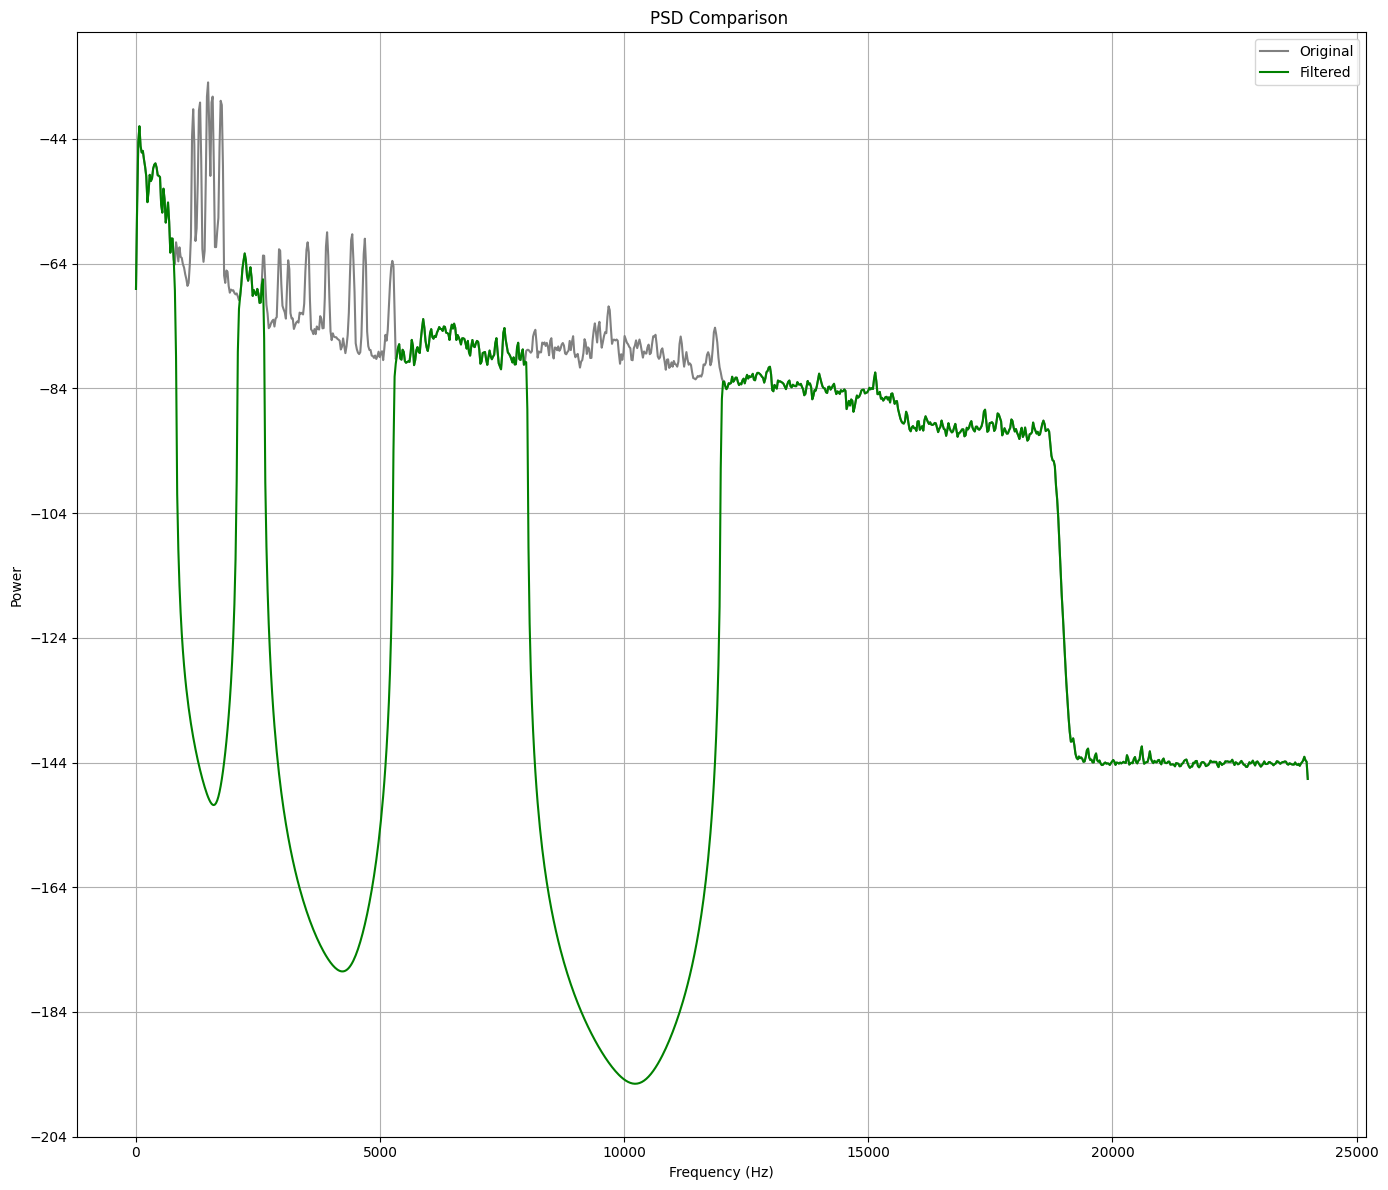

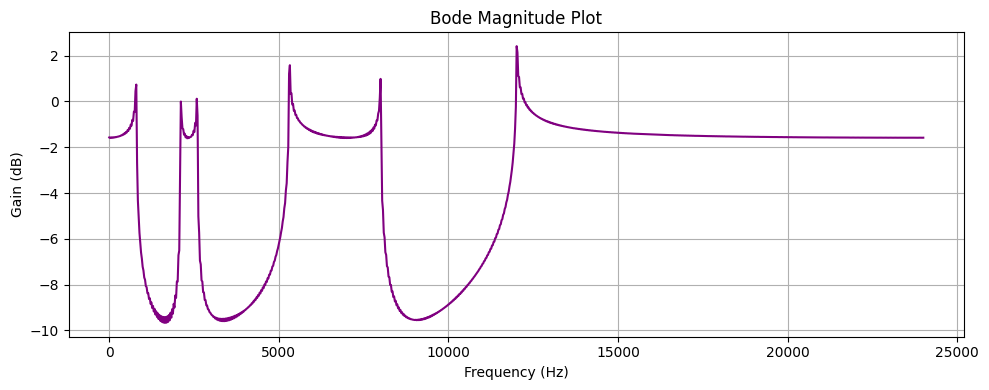

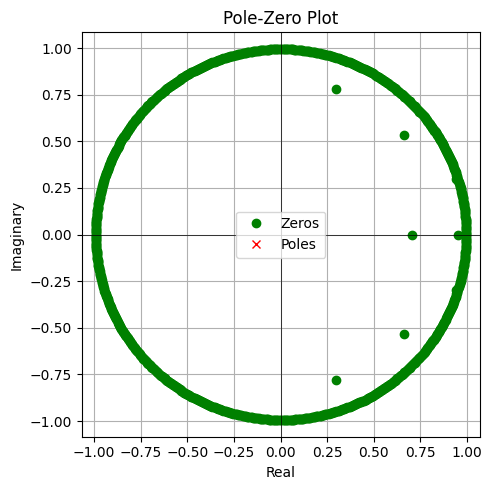

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from numpy.fft import fft, ifft, fftfreq
from numpy.polynomial.polynomial import Polynomial

y, sr = librosa.load("F:\\Python\\EE200\\EE200_practical_programming\\song_with_2piccolo.wav", sr=None)

N = len(y)
Y = fft(y)
freqs = fftfreq(N, 1/sr)

# desigining filter
filter = np.ones(N)
remove_bands = [(800, 2100), (2600, 5300), (8000, 12000)] # these are stop bands


for low, high in remove_bands:
    band = np.where((np.abs(freqs) >= low) & (np.abs(freqs) <= high))
    filter[band] = 0 

Y_filtered = Y * filter # applying filter
result = np.real(ifft(Y_filtered)) # this is now filtered audio in time domain
sf.write("output.wav", result, sr)

impulse_response = np.real(ifft(filter))

fir_filter = impulse_response[:1000] # taking first few components because computation for all is heavy

w = np.linspace(0, np.pi, 1024)
H = np.fft.fft(fir_filter, 2048) # fourier transform of impulse response 
H_dB = 20 * np.log10(np.abs(H[:1024]) + 1e-10) 
freq_axis = np.linspace(0, sr / 2, 1024)

zeros = np.roots(fir_filter) 
poles = np.array([])  # FIR filter ROC is entire z plane => no poles inside unit circle except at origin

plt.figure(figsize=(14, 12))

# Power spectral density plot
f_orig, psd_orig = plt.psd(y, NFFT=2048, Fs=sr, label='Original', color='gray')
f_filt, psd_filt = plt.psd(result, NFFT=2048, Fs=sr, label='Filtered', color='green')
plt.title("PSD Comparison ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bode plot for filter
plt.figure(figsize=(10, 4))
plt.plot(freq_axis, H_dB, color='purple')
plt.title("Bode Magnitude Plot")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Pole-Zero plot
plt.figure(figsize=(5, 5))
plt.plot(np.real(zeros), np.imag(zeros), 'go', label='Zeros')
plt.plot(np.real(poles), np.imag(poles), 'rx', label='Poles') # no poles for finite duration impulse response
#except maybe at 0

unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(unit_circle)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')
plt.grid(True)
plt.title("Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend()
plt.tight_layout()
plt.show()

